![Lieferando Image](/Users/veyselaytekin/Desktop/byte/Delivery-Time-Predictor-Machine-Learning-/Photos/lieferando_for_jupyter_notebook.jpeg)

# Problem Statement

The objective of this project is to develop a Machine Learning model that accurately predicts the food delivery time for orders placed through food delivery services like **Lieferando**. 

The model will take into account the historical delivery times for similar distances to ensure accurate and reliable real-time predictions, thereby improving transparency and customer satisfaction.

It is very important for food delivery company to get this right, as it has a big impact on consumer experience. Order lateness/ underprediction of delivery time is of particular concern as past experiments suggest that underestimating delivery time is roughly twice as costly as overestimating it. Orders that are very early / late are also much worse than those that are only slightly early or late. In this project, I will build a model to predict the estimated time taken for a delivery, wich is the total seconds value between ‘created_at’ and ‘actual_delivery_time’.

In the following, the compelling insights and findings will be presented, and the results and error measurements from each model will be compared and displayed in the model session. Last, I will show the quality and reliability of the results by comparing different machine learning models.

### 1- Explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
import warnings
import folium
import os

# filter out warning messages
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/veyselaytekin/Desktop/byte/Delivery-Time-Predictor-Machine-Learning-/Data/finalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
df.shape

(45584, 20)

In [4]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [5]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [6]:
# Rename the column
df = df.rename(columns={'time_taken (min)': 'time_taken'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45584 non-null  object 
 1   delivery_person_id           45584 non-null  object 
 2   delivery_person_age          43730 non-null  float64
 3   delivery_person_ratings      43676 non-null  float64
 4   restaurant_latitude          45584 non-null  float64
 5   restaurant_longitude         45584 non-null  float64
 6   delivery_location_latitude   45584 non-null  float64
 7   delivery_location_longitude  45584 non-null  float64
 8   order_date                   45584 non-null  object 
 9   time_orderd                  43853 non-null  object 
 10  time_order_picked            45584 non-null  object 
 11  weather_conditions           44968 non-null  object 
 12  road_traffic_density         44983 non-null  object 
 13  vehicle_conditio

In [8]:
#Check statistical values for fields with other than numerical datatype
df.describe(exclude=np.number).T

,count,unique,top,freq
id,45584,45584,0xcdcd,1
delivery_person_id,45584,1320,JAPRES11DEL02,67
order_date,45584,44,15-03-2022,1192
time_orderd,43853,176,21:55,461
time_order_picked,45584,193,21:30,495
weather_conditions,44968,6,Fog,7653
road_traffic_density,44983,4,Low,15476
type_of_order,45584,4,Snack,11530
type_of_vehicle,45584,4,motorcycle,26429
festival,45356,2,No,44460


In [9]:
df.isnull().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken                        0
dtype: int64

### 1- Clean the time_orderd and time_orderd_picked time columns

In [10]:
#Function to clean time columns

def clean_time_column(time_series):
    cleaned_times = []

    for time in time_series:
        time = str(time) # Ensure the value is a string

        # Remove rows with values containing a dot 
        if '.' in time:
            continue

        # Remove rows with integer values
        if time.isdigit():
            continue

        # Replace '24' with '00'
        if time.startswith('24'):
            time = '00' + time[2:]

        # Convert 'HH:MM:SS' to 'HH:MM'
        if len(time.split(':')) == 3:
            time = time[:5]

        cleaned_times.append(time)
    return pd.Series(cleaned_times)

In [11]:
# Apply the cleaning function to both columns
df['time_orderd'] = clean_time_column(df['time_orderd'])
df['time_order_picked'] = clean_time_column(df['time_order_picked'])

### 2- order_date column to date format

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

In [13]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day

In [14]:
#Extract city code from Delivery person ID
df['city_code']=df['delivery_person_id'].str.split("RES", expand=True)[0]

In [15]:
# drop the columns which won't be used in building model
def drop_columns(data):
    df.drop(['id','delivery_person_id'], axis=1, inplace=True)

In [16]:
drop_columns(df)

In [17]:
# check the duplicated values
if len(df[df.duplicated()]) > 0:
    print('There are duplicated values present')

In [18]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)

In [19]:
df.isnull().sum().sort_values(ascending=False)

time_order_picked              4127
time_orderd                    4068
delivery_person_ratings        1908
delivery_person_age            1854
city                           1200
multiple_deliveries             993
weather_conditions              616
road_traffic_density            601
festival                        228
day                               0
month                             0
year                              0
time_taken                        0
vehicle_condition                 0
type_of_vehicle                   0
type_of_order                     0
order_date                        0
delivery_location_longitude       0
delivery_location_latitude        0
restaurant_longitude              0
restaurant_latitude               0
city_code                         0
dtype: int64

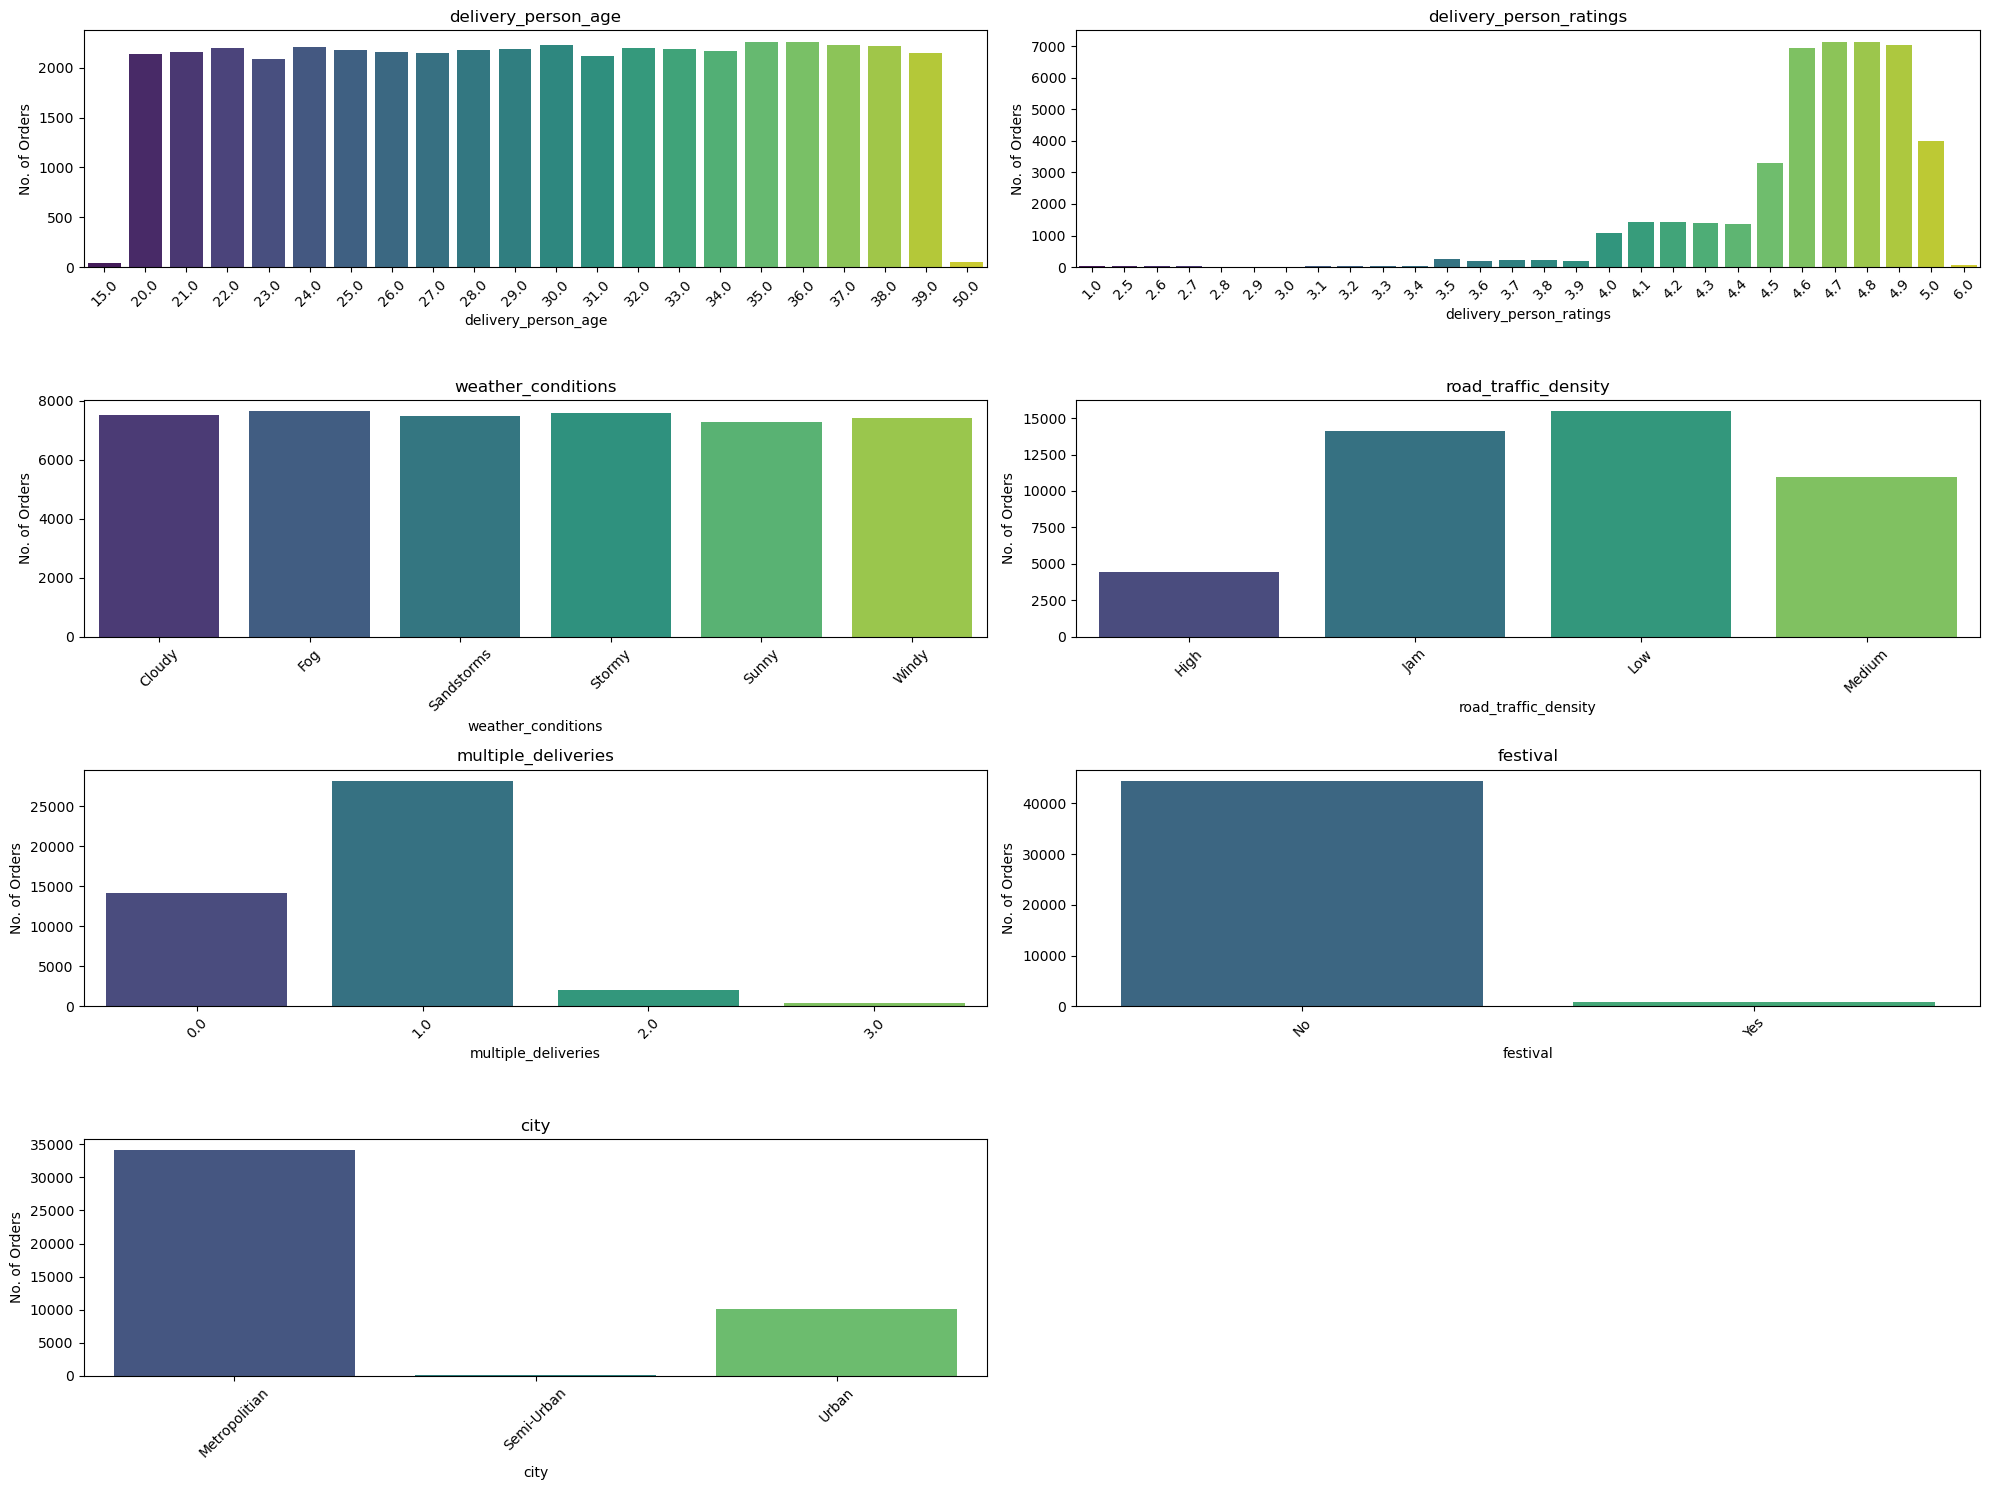

In [20]:
# Let's explore the column that have null value
# List of columns to plot
cols = ['delivery_person_age','delivery_person_ratings','weather_conditions','road_traffic_density','multiple_deliveries','festival','city']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().sort_index().index, ax=ax, palette="viridis")

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

### Handling with missing values

In [21]:
df.columns

Index(['delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken', 'year',
       'month', 'day', 'city_code'],
      dtype='object')

In [26]:
def impute_missing_values(data):
    # Columns to impute with mean
    mean_cols = ["delivery_person_age", "delivery_person_ratings"]

    # Columns to impute with mode
    mode_cols = ["weather_conditions", "road_traffic_density", 
                 "multiple_deliveries", "festival", "city"]

    # Impute with mean
    mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    for col in mean_cols:
        data[col] = mean_imp.fit_transform(data[col].to_numpy().reshape(-1, 1)).flatten()

    # Impute with mode
    mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    for col in mode_cols:
        data[col] = mode_imp.fit_transform(data[col].to_numpy().reshape(-1, 1)).flatten()

    return data

In [31]:
df = impute_missing_values(df)
df.isnull().sum().sort_values(ascending=False)

time_order_picked              4127
time_orderd                    4068
delivery_person_age               0
type_of_order                     0
day                               0
month                             0
year                              0
time_taken                        0
city                              0
festival                          0
multiple_deliveries               0
type_of_vehicle                   0
vehicle_condition                 0
delivery_person_ratings           0
road_traffic_density              0
weather_conditions                0
order_date                        0
delivery_location_longitude       0
delivery_location_latitude        0
restaurant_longitude              0
restaurant_latitude               0
city_code                         0
dtype: int64